Load 16 layer VGG model. On the first run will download the weight files from the Internet and store them in the ~/.keras/models directory (approx 528 mb).

In [15]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import load_img, img_to_array

Create model and print model summary. We see that input is 224x224 pixels with 3 channels and output is 1000 classes

In [1]:
model = VGG16()

C:\Applications\Miniconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

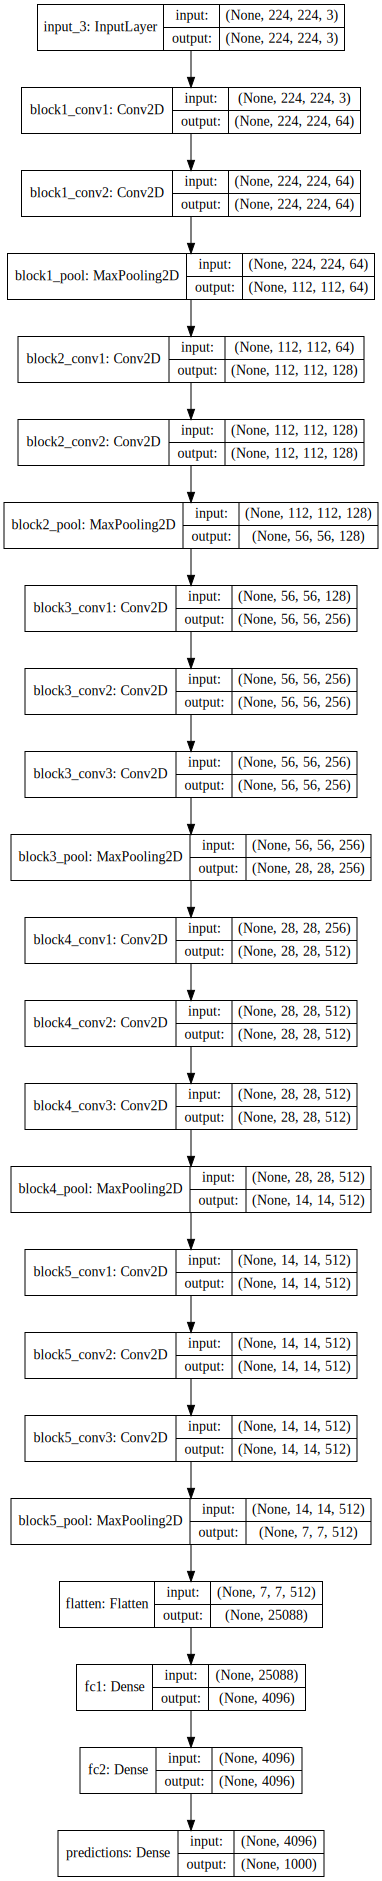

In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))
#plot_model(model, to_file='Keras VGG Image Recognition - VGG.png', show_shapes=True, show_layer_names=True)

## Load and Prepare Image

In [12]:
image = load_img('Keras VGG Image Recognition - Test Image.jpg', target_size=(224, 224))

# convert to numpy array
image = img_to_array(image)

# reshape data for the model (first dimension is the sample (we are only providing one image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model - imagenet is preprocessed in a specific way. Luckily Keras provides a function for this.
image = preprocess_input(image)

## Predict
Predicts the probability across all output classes

In [13]:
yhat = model.predict(image)

In [19]:
# convert the probabilities to class labels
label = decode_predictions(yhat)
print(label)

# retrieve the result with the highest probability
label = label[0][0]

# print the classification
print('Highest Prediction: %s (%.2f%%)' % (label[1], label[2]*100))

[[('n03063599', 'coffee_mug', 0.75266165), ('n03063689', 'coffeepot', 0.08365986), ('n07930864', 'cup', 0.06440082), ('n04398044', 'teapot', 0.030264245), ('n03950228', 'pitcher', 0.025889616)]]
Highest Prediction: coffee_mug (75.27%)
